# A baseline model for the begineers 

* MD AKIL RAIHAN IFTEE.
* COMPUTER SCIENCE AND ENGINEERING.
* KHULNA UNIVERSITY OF ENGINEERING AND TECHENOLOGY, BANGLADESH
* YEAR: 2ND (UNDERGRADUATE B.Sc.)

* I am new to data science. This is my 2nd competetion of machine learing challenge. If I score better than this, I will keep updating it.
* It is also my first notebook in my life. So, if I made any mistake, please feel free to correct me.

# 91.06581 scored and 25 ranked

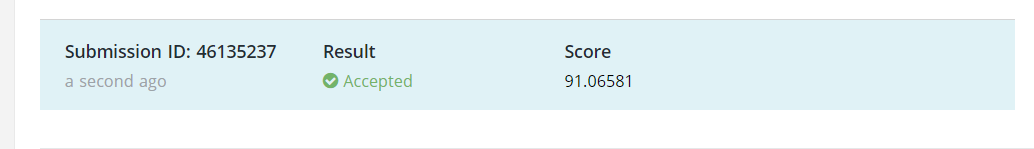

* It is a multi-label or multi output classification problem. You have to predict two labels: 'breed_catagory' and 'pet_catagory'.
* Formally, multi-label classification is the approach of finding a model that maps inputs, x to binary vectors, y (assigning a value of 0 or 1 for each element (label) in y).
* How to solve it??
* The best solution here is to train two models.
1. Build one classification model and predict the output.
2. Use the predicted output of 1st model as input feature to 2nd model.
* you can also try multi-class classification i.e., predicting both labels simultaneously, but it will give you poor score.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here are several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train=pd.read_csv("../input/hackerearth-ml-challenge-pet-adoption/train.csv")
test=pd.read_csv("../input/hackerearth-ml-challenge-pet-adoption/test.csv")
train.head()

In [ ]:
test.head()

In [ ]:
train.shape,test.shape

#  check  missing values

In [ ]:
train.info()

In [ ]:
test.info()

we found missing values only in the column of 'Condition'.

In [ ]:
train['breed_category'].value_counts()

In [ ]:
#cheak
a=train['breed_category'][(np.isnan(train['condition']))]
a.value_counts()

It means all the missing values belong to a single particular label. So, we can fill them with a unique value like -1.

**combine train and test data** 

In [ ]:
#copy all test id to create submission file
test_id=test['pet_id']
#save the train left...it will use when the combine data will split into the previous train and test data after doing feature engineering
ntrain=train.shape[0]

In [ ]:
#save target variable i.e label
y1=train['breed_category']
y2=train['pet_category']

In [ ]:
#combine test and train data
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['breed_category','pet_category'], axis=1, inplace=True)

now it's ready to do feature engineering

# Feature Engineering

**missing value fillup with -1**

In [ ]:
all_data['condition'].value_counts()

In [ ]:
all_data['condition'].fillna(-1,inplace=True)

In [ ]:
all_data['condition'].value_counts()

In [ ]:
all_data.info()

So, there is no null values in any column of all_data.

**seasonal feature(new feature)**

Since all the pets are not found in the same season,  it is an important feature. For example,
*  Best Birth Months for the Dog: January, February, March, August, December
*  Best Birth Months for the Dog: March, April, July, August.
* so both are not same.

In [ ]:
all_data['issue_date']=pd.to_datetime(all_data['issue_date'])
all_data['listing_date']=pd.to_datetime(all_data['listing_date'])


In [ ]:
x=[]
for d in all_data['issue_date']:
    y=d.month
    x.append(y)
all_data['issue_month']=x

In [ ]:
x=[]
for d in all_data['listing_date']:
    y=d.month
    x.append(y)
all_data['listing_month']=x

**time difference between issue and listing date(new feature)**

It will be a great feature as all the animals which are available in shelter must be matured. Maybe, the issue date can be considered as birth time and the listing date as the time of the animals' being matured for staying in shelter. So, the difference between two of them indicates the time for getting mature of an animal which is not same for all the animals. Therefore, it is also an important feature.  

In [ ]:
x=[]
for d in all_data['listing_date']:
    y=d.year+(d.month/12.0)+(d.day/365.0)
    x.append(y)
all_data['modified_listing_date']=x

In [ ]:
x=[]
for d in all_data['issue_date']:
    y=d.year+(d.month/12.0)+(d.day/365.0)
    x.append(y)
all_data['modified_issue_date']=x

In [ ]:
all_data['took_time']=abs(all_data['modified_listing_date']-all_data['modified_issue_date'])

**Modified pet id and extract important feature**

* when the dataset was creating, it might be happened that it was listing with special id for a particular animal.
* just like ANSL_69903.so,all ANSL_6**** i.e., the id starts with 6 maybe a particular animal because we can see that all the ids are not coming serially.
* so extracting the 1st and both 1st and 2nd numbers maybe a good feature.

In [ ]:

all_data['1stnum'] = all_data['pet_id'].str[:6]
all_data['1st2num'] = all_data['pet_id'].str[:7]

split back to the train and test data

In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
#drop some unnecessary features
x=train.drop(['pet_id','issue_date','listing_date','modified_issue_date'],axis=1)
test=test.drop(['pet_id','issue_date','listing_date','modified_issue_date'],axis=1)


* **handle categorical variable**

In [ ]:
x.select_dtypes(exclude='number').columns.to_list()

There are a lot of ways to handle categorical variables:
* Replacing values
* Encoding labels
* One-Hot encoding
* Binary encoding
* Backward difference encoding
* Miscellaneous features
* I used one-hot encoding and achived a great score

One Hot endcode

In [ ]:
x.shape

In [ ]:
x=pd.get_dummies(x)
test=pd.get_dummies(test)


In [ ]:
x.shape,test.shape

You can see that both shapes are not same. Train has 97 and test has 95 columns. It means the train and test data contain 2 extra columns after one-hot endcoding. We have to remove these 2 columns from the train data.

In [ ]:
a=set(x.columns)-set(test.columns)

In [ ]:
a=list(a)
a

In [ ]:
x=x.drop(a,axis=1)

In [ ]:
x.shape,test.shape

In [ ]:
#again combining
all_data = pd.concat((x, test)).reset_index(drop=True)

**Scaling using StandardScaler()**

In [ ]:
from sklearn import preprocessing
# Get column names first
names = all_data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(all_data)
all_data = pd.DataFrame(scaled_df, columns=names)

# split data for 1st model i.e., pet_category prediction

In [ ]:
x = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y2,test_size=0.2,random_state=44,shuffle=True)

# model 1 build i.e pet_category prediction

* I will not provide the hyperparameter tuning of model. After all, it is a small task for you. I will update it with that.
* i think you should try yourself to obtain a good score.
* I will just give you an example, but I can't promise that it will give you my final score of 91.06. To achive that, you must do hyperparameter tuning.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model1 = XGBClassifier()
model1.fit(x1_train, y1_train)

# build 2nd model i.e predict breed_category

We will use the output of **MODEL 1** as an input feature of **MODEL 2** .Trust me, it will increase your score.

build new dataset for model 2

In [ ]:
#new_feat is new feature i.e the predicted pet_category of model 1 for train data
new_feat=model1.predict(x)
#output1 is new first output i.e the predicted pet_category of model 1 for test data
output1=model1.predict(test)
#vld1 is validation 1 i.e we'll check score with the predicted result of validation data of model 1
vld1=model1.predict(x1_test)

In [ ]:
x2 = pd.DataFrame(x, columns=names)
test2 = pd.DataFrame(test, columns=names)

In [ ]:
#the predicted pet_category of model 1 for train data is used as a input variable or feature of the train data of model 2
x2['output1']=new_feat
#the predicted pet_category of model 1 for test data is used as a input variable or feature of the test data of model 2
test2['output1']=output1

**split data for model 2**

In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y1,test_size=0.2,random_state=44)

**Build model 2 and train the model with new data**

In [ ]:
model2 = XGBClassifier()
model2.fit(x2_train, y2_train)

In [ ]:
#output 2 is the predicted breed_category of model 2 for test data
output2=model2.predict(test)
#vld2 is validation 2 i.e we'll check score with the predicted result of validation data of model 2
vld2=model2.predict(x2_test)

# Check Accuracy

In [ ]:
from sklearn.metrics  import f1_score

In [ ]:
s1=f1_score(y1_test,vld1,average='weighted')
s2=f1_score(y2_test,vld2,average='weighted')
accuracy=100*((s1+s2)/2)
accuracy

without any hyperparameter tuning,it shows a good score.let's create a submission file

# Create Submission file

In [ ]:
sub_new=pd.DataFrame({
    "pet_id":test_id,
    "breed_category":output2,
    "pet_category":output1
})
sub_new.to_csv("sub_new.csv",index=False)

ok.wait,i am going to submit it on hackerearth

# Oh WOW! without any hyperparameter tuning,Hackerearth shows 90.67787

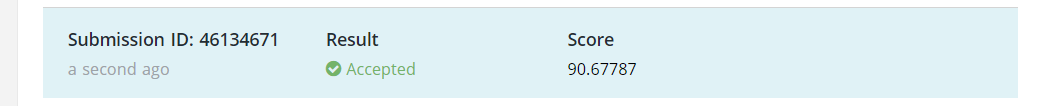

# some tips

* Use the predicted output of 'pet_catagory' as a feature of model 2 i.e., predict 'breed_catagory'
* BUT if you use 'breed_catagory' as a feature of model 2 i.e., predict 'pet_catagory' it will not give you a good score.
* I checked both and found it

let's see,the outputs

In [ ]:
y1.value_counts()

In [ ]:
y2.value_counts()

* You can clearly see it is an imbalanced data.
* To handle this imbalanced data, I have used SMOTE, OVERSAMPLING, UNDERSAMPLING, but they don't give me better score also.
* So, you must select a good cross-validation where all the labels come as a sample of same amount.


Let's check skewness

In [ ]:
from scipy.stats import skew

In [ ]:
y1.skew(axis = 0, skipna = True),y2.skew(axis = 0, skipna = True)

It shows, there is skewness of labels. To handle it, I used LOG Transformation(log1p of numpy). But it didn't give me better score than before

* I also used PCA, TruncatedSVD for dimension reduction and feature sclection.
* It gave me poor score.
* you must do feature selection considering the correlation of features.

* To handle missing values, I used KnnImputer. But it doesn't results good score.
* First, I filled the missing values with 3 as a unique variable. But I achived a good score by filling it with -1.

* At the beginning of the competition, I ran my model with Logistic Regression, KNN, Support Vector Machine. It resulted a poor score and couldn't cross 80 score.
* After using randomforestclassifier,it is around 88-89 score.
* But after checking with XgboostClassifier, Adaboost, Lightgbm, CatboostClassifier, etc. tree based models, I have achieved a better score above 90. So,you should try tree-based models I think.

Last of all,you must do hyperparameter tuning to earned an excellent score..

Finally, a free advise for the beginners(I am also a beginner after all),keep learning new things what found in this notebook and keep practicing. Try to achive better score than me and share your ideas with me...

# This is my first notebook of my life. I am just a beginner.So,if I made any mistake,please inform me. I will be glad. Please Upvote and Share this with others.